# Matlab으로 데이터 시각화하기

**데이터를 보기좋게 표현해봅시다.**

#### 1. Matplotlib 시작하기
   
#### 2. 자주 사용되는 Plotting의 Options
- 크기 : `figsize`
- 제목 : `title`
- 라벨 : `_label`
- 눈금 : `_tics`
- 범례 : `legend`
  
#### 3. Matplotlib Case Study
- 꺾은선 그래프 (Plot)
- 산점도 (Scatter Plot)
- 박스그림 (Box Plot)
- 막대그래프 (Bar Chart)
- 원형그래프 (Pie Chart)
  
#### 4. The 멋진 그래프, seaborn Case Study
- 커널밀도그림 (Kernel Density Plot)
- 카운트그림 (Count Plot)
- 캣그림 (Cat Plot)
- 스트립그림 (Strip Plot)
- 히트맵 (Heatmap)
  

## I. Matplotlib 시작하기

- 파이썬의 데이터 시각화 라이브러리  
cf) 라이브러리(np, pd, matplot) vs 프레임워크(django, flask)
- `%matplotlib inline`을 통해서 활성화

In [4]:
!pip install matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)


## II. Matplotlib Case Study

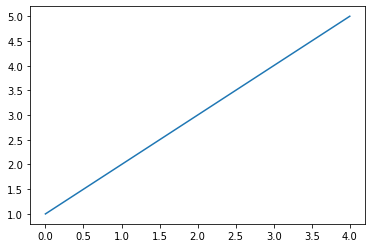

In [6]:
plt.plot([1,2,3,4,5]) # 실제 plotting을 하는 함수 # y = x + 1
plt.show() # plt를 확인하는 명령

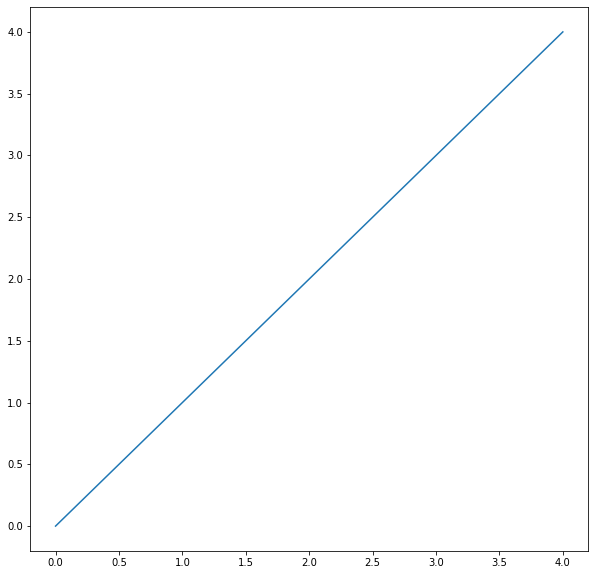

In [10]:
figsize = (10, 10)

plt.figure(figsize = figsize) # plotting을 할 도면을 선언

plt.plot([0, 1, 2, 3, 4]) # 실제 plotting을 하는 함수 # y = x
plt.show() # plt를 확인하는 명령

**2차함수 그래프 with plot()**

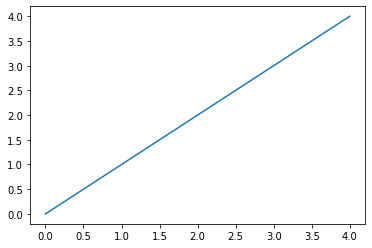

In [11]:
# 리스트를 이용해서 1차함수 y=x를 그려보면:

plt.plot([0, 1, 2, 3, 4])
plt.show()

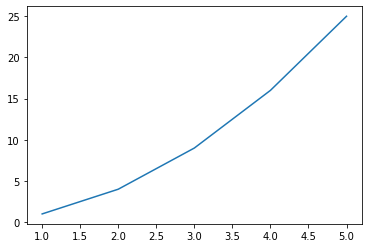

In [12]:
# numpy.array를 이용해서 함수 그래프 그리기
# y=x^2
x = np.array([1, 2, 3, 4, 5]) # 정의역
y = np.array([1, 4, 9, 16, 25]) # f(x)

plt.plot(x, y)
plt.show()

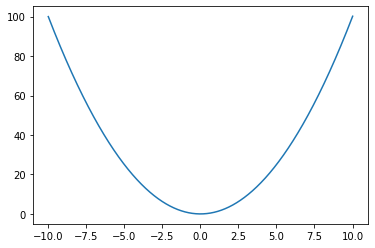

In [17]:
# np.arange(a, b, c) : a, b, c = start, end, step(flot avail)
x = np.arange(-10, 10.01, 0.001)
plt.plot(x, x**2)

plt.show()

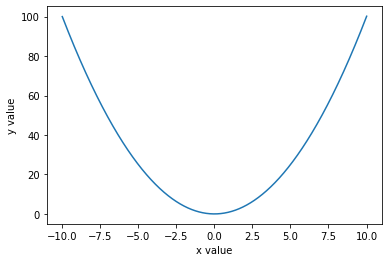

In [22]:
# x, y 축에 설명 추가하기

x = np.arange(-10, 10.01, 0.001)

### - Q: 2 그래프만 가능한가요?
plt.xlabel("x value")
plt.ylabel("y value")
###

plt.plot(x, x**2)

plt.show()

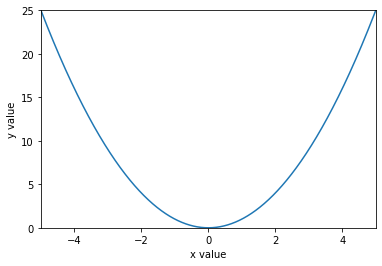

In [23]:
# x, y축의 범위를 설정하기

x = np.arange(-10, 10.01, 0.001)

### - Q: 2 그래프만 가능한가요?
plt.xlabel("x value")
plt.ylabel("y value")
###

plt.axis([-5, 5, 0, 25]) # [x_min, x_max, y_min, y_max]

plt.plot(x, x**2)

plt.show()

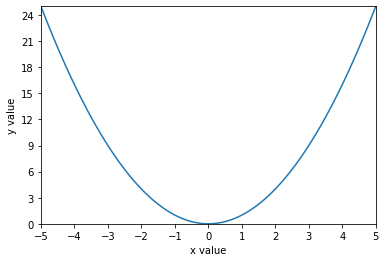

In [29]:
# x, y축의 눈금 설정하기

x = np.arange(-10, 10.01, 0.001)

### - Q: 2 그래프만 가능한가요?
plt.xlabel("x value")
plt.ylabel("y value")
###
plt.axis([-5, 5, 0, 25]) # [x_min, x_max, y_min, y_max]
plt.xticks([i for i in range(-5, 6, 1)]) # x축의 눈금 설정
plt.yticks([i for i in range(0, 25, 3)]) # y축의 눈금 설정
plt.plot(x, x**2)

plt.show()

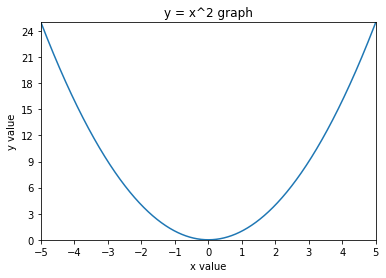

In [31]:
# 그래프에 title 달기

# x, y축의 눈금 설정하기

x = np.arange(-10, 10.01, 0.001)

### - Q: 2 그래프만 가능한가요?
plt.xlabel("x value")
plt.ylabel("y value")
###
plt.axis([-5, 5, 0, 25]) # [x_min, x_max, y_min, y_max]
plt.xticks([i for i in range(-5, 6, 1)]) # x축의 눈금 설정
plt.yticks([i for i in range(0, 25, 3)]) # y축의 눈금 설정

plt.title("y = x^2 graph")
plt.plot(x, x**2)

plt.show()

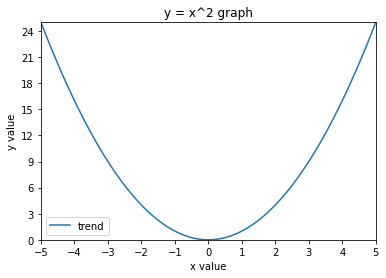

In [34]:
# 범례달기

x = np.arange(-10, 10.01, 0.001)

plt.xlabel("x value")
plt.ylabel("y value")
plt.axis([-5, 5, 0, 25]) # [x_min, x_max, y_min, y_max]
plt.xticks([i for i in range(-5, 6, 1)]) # x축의 눈금 설정
plt.yticks([i for i in range(0, 25, 3)]) # y축의 눈금 설정

plt.title("y = x^2 graph")
plt.plot(x, x**2, label="trend") # label로 잠정적 지정

##
plt.legend() # 그래프가 '생성된 후' 범례 생성
##

plt.show()


## III. Matplotlib Case Study

**꺾은선 그래프 (Plot)**

-`.plot()`

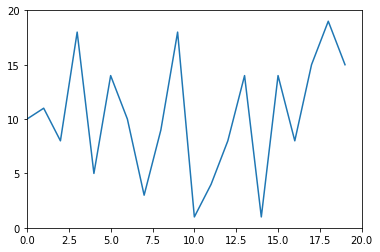

In [46]:
x = np.arange(20) # 0~19
y = np.random.randint(0, 20, 20) # 난수를 20번 생성

x, y

plt.plot(x, y)
plt.axis([0, 20, 0, 20])
plt.yticks([i for i in range(0, 21, 5)])

plt.show()



# Extra : y축을 20까지 보이게 하고 싶다면, y축을 "5"단위로 보이게하고 싶다면
# .axis(), .yticks() **yticks 설정하면 axis도 설정이 되는듯합니다.

**산점도 (Scatter Plot)**
- `.scatter()`

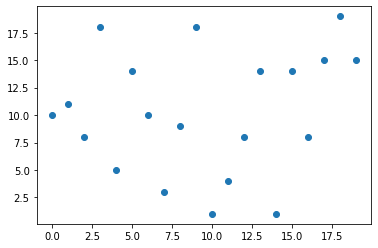

In [49]:
plt.scatter(x, y)
plt.show()

### 박스 그림 ( Box Plot)

- 수치형 데이터에 대한 정보 (Q1, Q2, Q3, min, max)

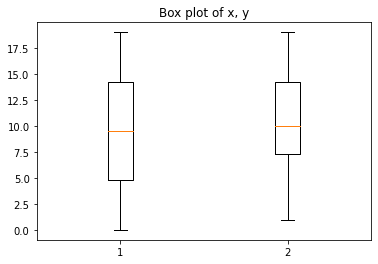

In [56]:
plt.title("Box plot of x, y")
plt.boxplot((x, y)) # tuple container
plt.show()

# Extra : Plot의 title을 "Box plot of y"


### 막대 그래프 (Bar plot)
- 범주형 데이터의 "값"과 그 값의 크기를 직사각형으로 나타낸 그림

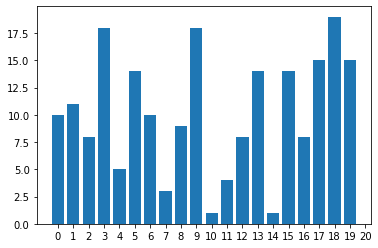

In [59]:
plt.xticks([i for i in range(0, 21, 1)])
plt.bar(x, y)
plt.show()

# Extra : xticks 를 올바르게 처리해봅시다.

(array([2., 1., 2., 0., 4., 3., 0., 5., 2.]),
 array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18]),
 <BarContainer object of 9 artists>)

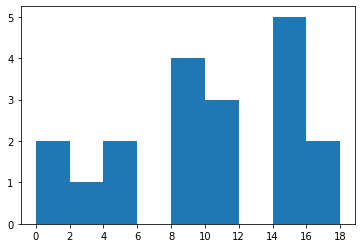

In [73]:
# cf) Histogram 
# .hist()
# 도수분포를 직사각형의 막대형태로 나타낸다.
# "계급"으로 나타낸 것이 특징: 0, 1, 2가 아니라 0~2까지의 "범주형" 데이터로 구성 후 그림을 그림
plt.xticks([i for i in range(0, 21, 2)])
plt.hist(y, bins=np.arange(0, 20, 2))

### 원형 그래프 (Pie Chart)

- 데이터에서 전체에 대한 부분의 비율을 부채꼴로 나타낸 그래프
- 다른 그래프에 비해 비율 확인에 용이
- `.pie()`

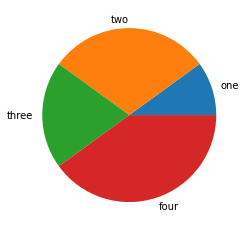

In [77]:
z = [100, 300, 200, 400]

plt.pie(z, labels=["one", "two", "three", "four"])
plt.show()

## IV. The 멋진 그래프, Seaborn Case Study

### Matplotlib를 기반으로 더 다양한 시각화 방법을 제공하는 라이브러리

- 커널밀도그림
- 카운트그림
- 캣그림
- 스트립그림
- 히트맵

### Seaborn Import 하기

In [78]:
!pip install seaborn
import seaborn as sns

### 커널밀도그림 (Kernel Density Plot)

- 히스토그램과 같은 연속적인 분포를 곡선화해서 그린 그림
- `sns.kdeplot()`


In [79]:
# in Histogram

x = np.arange(0, 22, 2)
y = np.random.randint(0, 20, 20)

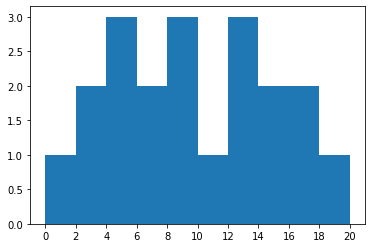

In [84]:
plt.xticks(x)
plt.hist(y, bins=x)

plt.show()

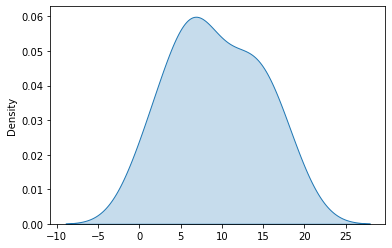

In [90]:
# kdeplot

sns.kdeplot(y, shade=True) # default = False

plt.show()

### 카운트그림 (Count Plot)

- 범주형 column의 빈도수를 시각화 -> Groupby 후의 도수를 하는 것과 동일한 효과
- `sns.countplot()`

In [91]:
vote_df = pd.DataFrame({"name":["Andy", "Bob", "cat"], "vote": [True, True, False]})

vote_df

,name,vote
0,Andy,True
1,Bob,True
2,cat,False


In [95]:
# in matplotlib barplot

vote_count = vote_df.groupby('vote').count()

vote_count

,name
vote,
False,1
True,2


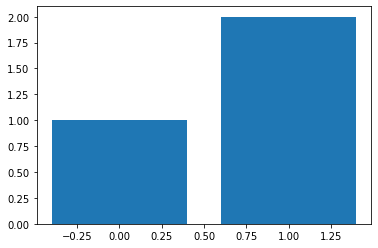

In [97]:
plt.bar(x=[False, True], height=vote_count['name'])
plt.show()

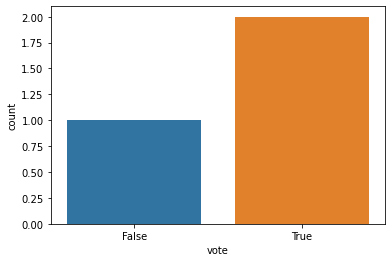

In [101]:
# sns의 countplot

sns.countplot(x = vote_df['vote'])

plt.show()

### 캣그림 (Cat Plot)

- 숫자형 변수와 하나 이상의 범주형 변수의 관계를 보여주는 함수
- `sns.catplot()`

In [102]:
covid = pd.read_csv("./country_wise_latest.csv")

covid.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


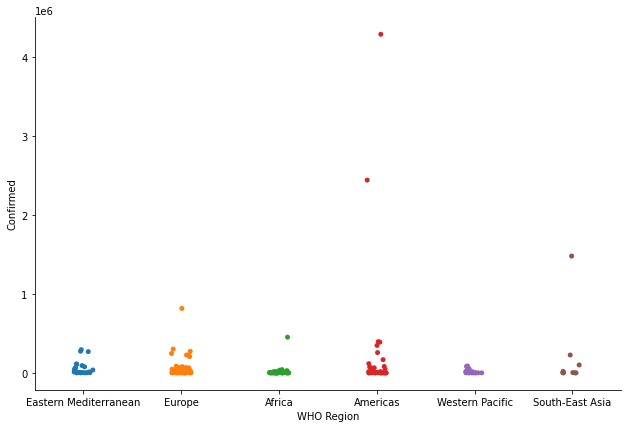

In [106]:
s = sns.catplot(x="WHO Region", y="Confirmed", data=covid, kind="strip") # hue?? kind??
figsize = (10, 10)
s.fig.set_size_inches(10, 6)
plt.show()

### 스트립그림 (Strip Plot)

- scatter plot과 유사하게 데이터의 수치를 표현하는 그래프
- `sns.stripplot()`

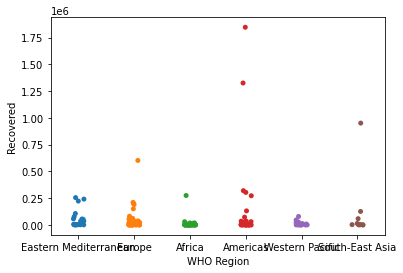

In [108]:
sns.stripplot(x="WHO Region", y="Recovered", data=covid)
plt.show()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 22.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 69.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 79.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 54.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 31.2% of the points

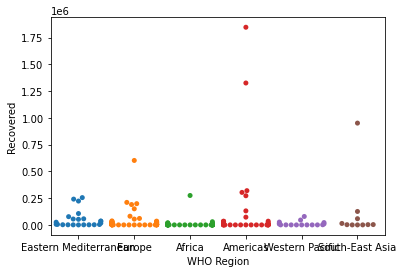

In [111]:
#cf) swarmplot
s = sns.swarmplot(x="WHO Region", y="Recovered", data=covid)
plt.show()

### 히트맵 (Heatmap)

- 데이터의 행렬을 색상으로 표현해주는 그래프
- `sns.heatmap()`

In [114]:
#히트맵 예제

covid.corr() # 상관계수 행렬을 반환

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
Confirmed,1.000000,0.934698,0.906377,0.927018,0.909720,0.871683,0.859252,0.063550,-0.064815,0.025175,0.999127,0.954710,-0.010161
Deaths,0.934698,1.000000,0.832098,0.871586,0.806975,0.814161,0.765114,0.251565,-0.114529,0.169006,0.939082,0.855330,-0.034708
Recovered,0.906377,0.832098,1.000000,0.682103,0.818942,0.820338,0.919203,0.048438,0.026610,-0.027277,0.899312,0.910013,-0.013697
Active,0.927018,0.871586,0.682103,1.000000,0.851190,0.781123,0.673887,0.054380,-0.132618,0.058386,0.931459,0.847642,-0.003752
New cases,0.909720,0.806975,0.818942,0.851190,1.000000,0.935947,0.914765,0.020104,-0.078666,-0.011637,0.896084,0.959993,0.030791
New deaths,0.871683,0.814161,0.820338,0.781123,0.935947,1.000000,0.889234,0.060399,-0.062792,-0.020750,0.862118,0.894915,0.025293
New recovered,0.859252,0.765114,0.919203,0.673887,0.914765,0.889234,1.000000,0.017090,-0.024293,-0.023340,0.839692,0.954321,0.032662
Deaths / 100 Cases,0.063550,0.251565,0.048438,0.054380,0.020104,0.060399,0.017090,1.000000,-0.168920,0.334594,0.069894,0.015095,-0.134534
Recovered / 100 Cases,-0.064815,-0.114529,0.026610,-0.132618,-0.078666,-0.062792,-0.024293,-0.168920,1.000000,-0.295381,-0.064600,-0.063013,-0.394254
Deaths / 100 Recovered,0.025175,0.169006,-0.027277,0.058386,-0.011637,-0.020750,-0.023340,0.334594,-0.295381,1.000000,0.030460,-0.013763,-0.049083


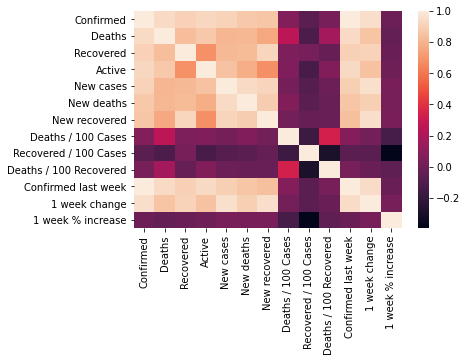

In [115]:
sns.heatmap(covid.corr())
plt.show()

## Mission:

### 